### CSV
Comma-separated values (ou CSV) é um formato de arquivo que armazena dados tabelados, 
cujo grande uso data da época dos mainframes. 
O CSV é um implementação particular de arquivos de texto separados por um delimitador, 
que usa a vírgula e a quebra de linha para separar os valores. 
O formato também usa as aspas em campos no qual são usados os caracteres reservados (vírgula e quebra de linha). 

#### Lendo arquivo CSV com Pandas

Documentação:
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

Exemplos:
https://chrisalbon.com/python/data_wrangling/pandas_dataframe_importing_csv/

In [16]:
# Lendo arquivo CSV armazenado em diretório hadoop local
import pandas as pd
df00 = pd.read_csv('titanic_kaggle.csv')

print('Verificando quantidade de linhas e colunas do arquivo importado:')
df00.shape

Verificando quantidade de linhas e colunas do arquivo importado:


(891, 12)

In [17]:
# Verificando as 5 primeiras linhas do arquivo importado
df00.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### -----------------------------------------------------------------------------------------------------------------------------------------------------------

### JSON
JavaScript Object Notation
Trata-se de uma formatação leve de troca de dados. Para seres humanos, é fácil de ler e escrever. 
Para máquinas, é fácil de interpretar e gerar. Está baseado em um subconjunto da linguagem de programação JavaScript, formato texto e completamente independente de linguagem, ideal para troca de dados.

fonte dados: https://catalog.data.gov/dataset?res_format=JSON

#### Copie o link abaixo e cole no browser para verificar a estrutura do aquivo JSON que será baixado pelo Python:
#### https://data.cdc.gov/api/views/bi63-dtpu/rows.json?accessType=DOWNLOAD

In [1]:
# Lendo arquivo JSON da URL
import urllib.request, json 
with urllib.request.urlopen("https://data.cdc.gov/api/views/bi63-dtpu/rows.json?accessType=DOWNLOAD") as url:
    data = json.loads(url.read().decode())

In [6]:
# Verificando o arquivo JSON baixado
data

{'meta': {'view': {'id': 'bi63-dtpu',
   'name': 'NCHS - Leading Causes of Death: United States',
   'attribution': 'National Center for Health Statistics',
   'averageRating': 0,
   'category': 'NCHS',
   'createdAt': 1449080633,
   'description': 'This dataset presents the age-adjusted death rates for the 10 leading causes of death in the United States beginning in 1999.\r\n\r\nData are based on information from all resident death certificates filed in the 50 states and the District of Columbia using demographic and medical characteristics. Age-adjusted death rates (per 100,000 population) are based on the 2000 U.S. standard population. Populations used for computing death rates after 2010 are postcensal estimates based on the 2010 census, estimated as of July 1, 2010. Rates for census years are based on populations enumerated in the corresponding censuses. Rates for non-census years before 2010 are revised using updated intercensal population estimates and may differ from rates prev

In [2]:
# Gravando arquivo que está na memoria no formato JSON (disco)
import json
with open('data.json', 'w') as outfile:
    json.dump(data, outfile)

In [3]:
# Instalando ijson (Não é recomendado instalar por aqui, o ideal é fazer via terminal de acesso SSH ao cluster)
import sys
!{sys.executable} -m pip install ijson

You are using pip version 9.0.3, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
import ijson

filename = "data.json"
with open(filename, 'r') as f:
    objects = ijson.items(f, 'meta.view.columns.item')
    columns = list(objects)

In [5]:
# Extrair o nome das colunas:
column_names = [col["fieldName"] for col in columns]
column_names

[':sid',
 ':id',
 ':position',
 ':created_at',
 ':created_meta',
 ':updated_at',
 ':updated_meta',
 ':meta',
 'year',
 '_113_cause_name',
 'cause_name',
 'state',
 'deaths',
 'aadr']

In [44]:
# Extrair o tipo das colunas:
column_types = [col["dataTypeName"] for col in columns]
column_types

['meta_data',
 'meta_data',
 'meta_data',
 'meta_data',
 'meta_data',
 'meta_data',
 'meta_data',
 'meta_data',
 'number',
 'text',
 'text',
 'text',
 'number',
 'number']

In [46]:
# Criando Metadados a partir do JSON
df_column_names = pd.DataFrame(data=column_names, columns=['Variavel'])
df_column_types = pd.DataFrame(data=column_types, columns=['Tipo'])
metadados = pd.merge(df_column_names, df_column_types, left_index=True, right_index=True)
metadados

,Variavel,Tipo
0,:sid,meta_data
1,:id,meta_data
2,:position,meta_data
3,:created_at,meta_data
4,:created_meta,meta_data
5,:updated_at,meta_data
6,:updated_meta,meta_data
7,:meta,meta_data
8,year,number
9,_113_cause_name,text


In [7]:
# Extraindo o nome do arquivo/estudo
data['meta']['view']['name']

'NCHS - Leading Causes of Death: United States'

In [8]:
# Extraindo a descriçao do estudo realizado
data['meta']['view']['description']

'This dataset presents the age-adjusted death rates for the 10 leading causes of death in the United States beginning in 1999.\r\n\r\nData are based on information from all resident death certificates filed in the 50 states and the District of Columbia using demographic and medical characteristics. Age-adjusted death rates (per 100,000 population) are based on the 2000 U.S. standard population. Populations used for computing death rates after 2010 are postcensal estimates based on the 2010 census, estimated as of July 1, 2010. Rates for census years are based on populations enumerated in the corresponding censuses. Rates for non-census years before 2010 are revised using updated intercensal population estimates and may differ from rates previously published.\r\n\r\nCauses of death classified by the International Classification of Diseases, Tenth Revision (ICD–10) are ranked according to the number of deaths assigned to rankable causes. Cause of death statistics are based on the underly

In [68]:
# Vamos selecionar algumas colunas para extrair informaçoes
good_columns = [
                'cause_name',
                'year',
                'state',
                'deaths',
                'aadr'
                ]

data_col = []
with open(filename, 'r') as f:
    objects = ijson.items(f, 'data.item')
    for row in objects:
        selected_row = []
        for item in good_columns:
            selected_row.append(row[column_names.index(item)])
        data_col.append(selected_row)

In [70]:
# Converter o Json para um Dataframe (tabela em memória)
import pandas as pd
df_json = pd.DataFrame(data=data_col,columns=['Causa','Ano','Estado','Qtd','Idade'])
df_json.head()

,Causa,Ano,Estado,Qtd,Idade
0,Unintentional injuries,2016,Alabama,2755,55.5
1,Unintentional injuries,2016,Alaska,439,63.1
2,Unintentional injuries,2016,Arizona,4010,54.2
3,Unintentional injuries,2016,Arkansas,1604,51.8
4,Unintentional injuries,2016,California,13213,32


In [76]:
# Salvar esta tabela no formato CSV
df_json.to_csv('Leading_Causes_Death.csv', sep=',', encoding='utf-8',index=True)

In [78]:
# Lendo arquivo CSV que acabamos de salvar
import pandas as pd
df01 = pd.read_csv('Leading_Causes_Death.csv', index_col=0)

print('Verificando quantidade de linhas e colunas do arquivo importado:')
df01.head()


Verificando quantidade de linhas e colunas do arquivo importado:


,Causa,Ano,Estado,Qtd,Idade
0,Unintentional injuries,2016,Alabama,2755,55.5
1,Unintentional injuries,2016,Alaska,439,63.1
2,Unintentional injuries,2016,Arizona,4010,54.2
3,Unintentional injuries,2016,Arkansas,1604,51.8
4,Unintentional injuries,2016,California,13213,32.0


### Outro Exemplo utilizando JSON

In [38]:
# Exemplo de aplicação 

import pandas as pd

# Definindo JSON de forma manual
end_turma ="""
        {
            "Nome":{
                     "0":"Bruno Jardim",
                     "1":"Tâmara A. Jardim",
                     "2":"Rauhe Abdulhamid"
                         },
            "Latitude":{
                    "0":-23.7273345,
                    "1":-23.6273344,
                    "2":-23.6344377
                    
                        },
            "Longitude":{
                    "0":-46.7369416,
                    "1":-46.6369415,
                    "2":-46.7246573                    
                         }
        }"""

# Traduzindo JSON para um dataframe (pandas)
df = pd.read_json(end_turma)

print('Dataframe gerado pelo JSON')
df.head(10)

Dataframe gerado pelo JSON


,Latitude,Longitude,Nome
0,-23.727335,-46.736942,Bruno Jardim
1,-23.627334,-46.636941,Tâmara A. Jardim
2,-23.634438,-46.724657,Rauhe Abdulhamid


In [34]:
# Instalando folium (Não é recomendado instalar por aqui, o ideal é fazer via terminal de acesso SSH ao cluster)
import sys
!{sys.executable} -m pip install folium

You are using pip version 9.0.3, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [43]:
# Vamos colocar os endereços com latitude e longitude no Mapa
# http://www.mapcoordinates.net/pt

import folium

location = df['Latitude'].mean(), df['Longitude'].mean()
locationlist = df[["Latitude","Longitude"]].values.tolist()
labels = df["Nome"].values.tolist()

m = folium.Map(location=location, zoom_start=10)
for point in range(len(locationlist)):
    popup = folium.Popup(labels[point], parse_html=True)
    folium.Marker(locationlist[point], popup=popup).add_to(m)
m

### ----------------------------------------------------------------------------------------------------------------------------------------------------

### PARQUET
O Parquet, diferente do txt e csv que são baseados em linha, é um formato colunar e binário que foi desenvolvido em uma cooperação entre o Twitter e Cloudera para criar uma representação colunar eficiente para qualquer projeto para o ecosistema Hadoop 

In [80]:
# Instalando pyarrow (Não é recomendado instalar por aqui, o ideal é fazer via terminal de acesso SSH ao cluster)
import sys
!{sys.executable} -m pip install pyarrow

    100% |████████████████████████████████| 11.6MB 57kB/s  eta 0:00:01   16% |█████▏                          | 1.9MB 47.8MB/s eta 0:00:01
You are using pip version 9.0.3, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [82]:
# Lendo arquivo parquet com pandas + pyarrow
df_parquet = pd.read_parquet('porto_seguro_kaggle.parquet', engine='pyarrow')
df_parquet.shape

(595212, 59)

In [83]:
df_parquet.head()

,b'id',b'target',b'ps_ind_01',b'ps_ind_02_cat',b'ps_ind_03',b'ps_ind_04_cat',b'ps_ind_05_cat',b'ps_ind_06_bin',b'ps_ind_07_bin',b'ps_ind_08_bin',...,b'ps_calc_11',b'ps_calc_12',b'ps_calc_13',b'ps_calc_14',b'ps_calc_15_bin',b'ps_calc_16_bin',b'ps_calc_17_bin',b'ps_calc_18_bin',b'ps_calc_19_bin',b'ps_calc_20_bin'
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


### ---------------------------------------------------------------------------------------------------------------------------------------------------------

### Quadro comparativo entre os formatos utilizados
http://garrens.com/blog/2017/10/09/spark-file-format-showdown-csv-vs-json-vs-parquet/

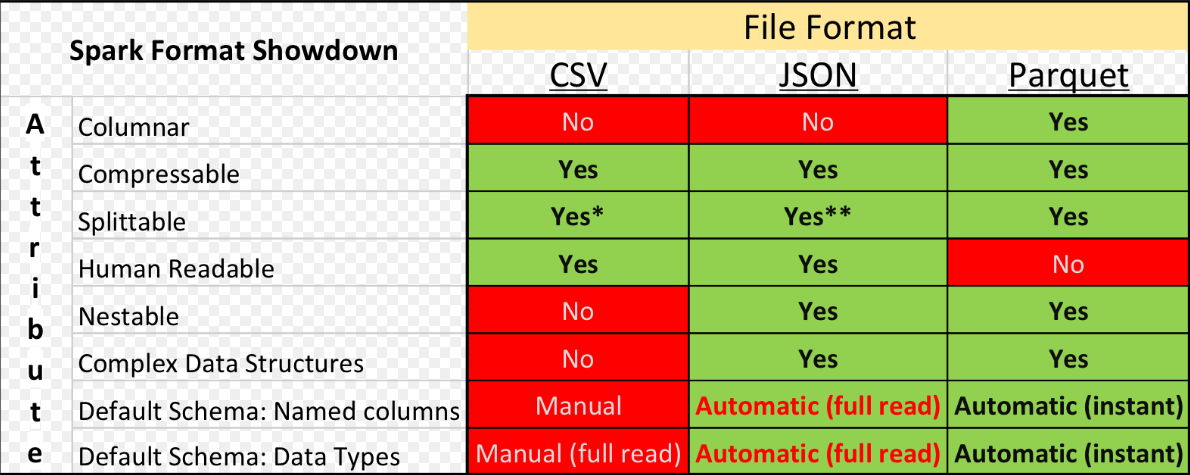

In [87]:
from IPython.display import Image
Image(filename='parquet_csv_json_camparativo.PNG') 